In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [4]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
data.shape

(8124, 23)

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Можем поделить грибы по цвету их шляпок.

In [7]:
mushroom_colors = data['cap-color'].value_counts()
m_height = mushroom_colors.values.tolist()
mushroom_colors.axes
mushroom_colors_labels = mushroom_colors.axes[0].tolist()

Text(0.5, 1.0, 'Mushroom Cap Color Quantity')

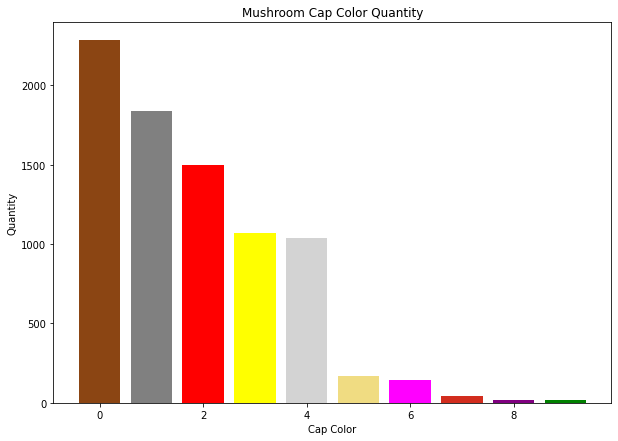

In [8]:
colors = ['#8B4513','#808080','#FF0000','#FFFF00','#D3D3D3','#F0DC82','#FF00FF','#D22D1E','#800080','#008000']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(np.arange(10), m_height , 0.8, color=colors)
ax.set_xlabel("Cap Color")
ax.set_ylabel('Quantity')
ax.set_title('Mushroom Cap Color Quantity')

Теперь посмотрим соотношение ядовитых грибов к не ядовитым.


In [9]:
poisoned_mushrooms = []
not_poisoned_mushrooms = []
for color in mushroom_colors_labels:
        size = len(data[data['cap-color'] == color].index)
        not_poisoned = len(data[(data['cap-color'] == color) & (data['class'] == 'e')].index)
        not_poisoned_mushrooms.append(not_poisoned)
        poisoned_mushrooms.append(size-not_poisoned)    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support [1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support [1020, 808, 876, 672, 320, 120, 88, 12, 0, 0] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


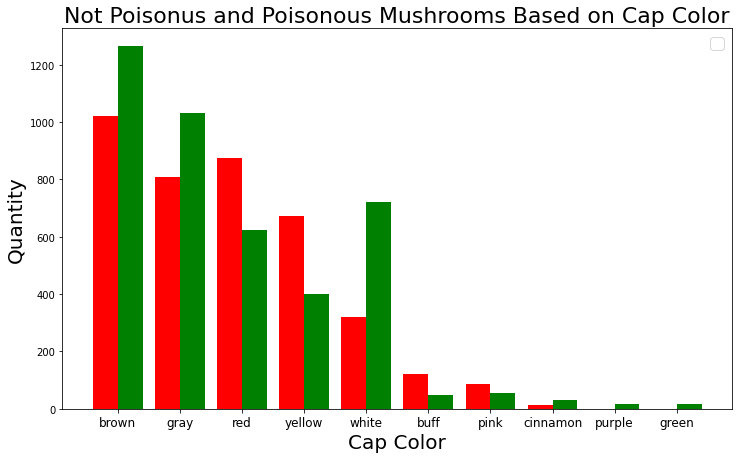

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
not_poisoned_bars = ax.bar(np.arange(10), poisoned_mushrooms , 0.40, color='r')
poisoned_bars = ax.bar(np.arange(10) + 0.40, not_poisoned_mushrooms , 0.40, color='g')
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Not Poisonus and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(np.arange(10) + 0.4 / 2) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((not_poisoned_mushrooms,poisoned_mushrooms),('not_poisoned_mushrooms','poisoned_mushrooms'),fontsize=17)

Как можно заметить, коричневые, серые и белые грибы менее ядовитые, и, наоборот, красные и желтые грибы скорее ядовитые, чем нет.

[4040, 1712, 1248, 400, 384, 340]


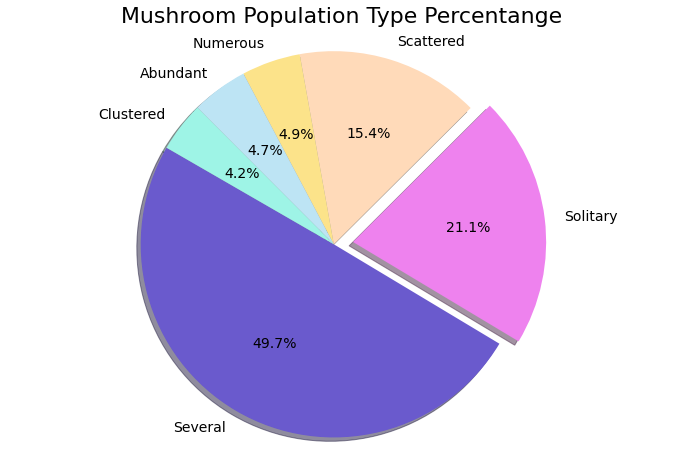

In [11]:
populations = data['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#6A5ACD','#EE82EE','#FFDAB9','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X=data.drop('class',axis=1)
y=data['class']
X = pd.get_dummies(X,columns=X.columns,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [15]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2951
           p       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	1.0000

Standard Deviation:	0.0000


In [16]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]



In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [18]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2951
           p       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	1.0000

Standard Deviation:	0.0000
